In [96]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='talk', fscale=1.8, spines=False, gridlines='--', ticks=True, grid=False, figsize=(12, 8))
from os.path import join
import pandas as pd
from matplotlib.ticker import FuncFormatter

### Load Transaction Data

In [113]:
baskets = pd.read_csv('grocery_transactions.csv', header=None)
baskets.iloc[:10, :10]

,0,1,2,3,4,5,6,7,8,9
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN
5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,NaN
6,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,NaN
8,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
baskets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
0     9835 non-null object
1     7676 non-null object
2     6033 non-null object
3     4734 non-null object
4     3729 non-null object
5     2874 non-null object
6     2229 non-null object
7     1684 non-null object
8     1246 non-null object
9     896 non-null object
10    650 non-null object
11    468 non-null object
12    351 non-null object
13    273 non-null object
14    196 non-null object
15    141 non-null object
16    95 non-null object
17    66 non-null object
18    52 non-null object
19    38 non-null object
20    29 non-null object
21    18 non-null object
22    14 non-null object
23    8 non-null object
24    7 non-null object
25    7 non-null object
26    6 non-null object
27    5 non-null object
28    4 non-null object
29    1 non-null object
30    1 non-null object
31    1 non-null object
dtypes: object(32)
memory usage: 2.4+ MB


### Plot Basket Size Breakdown

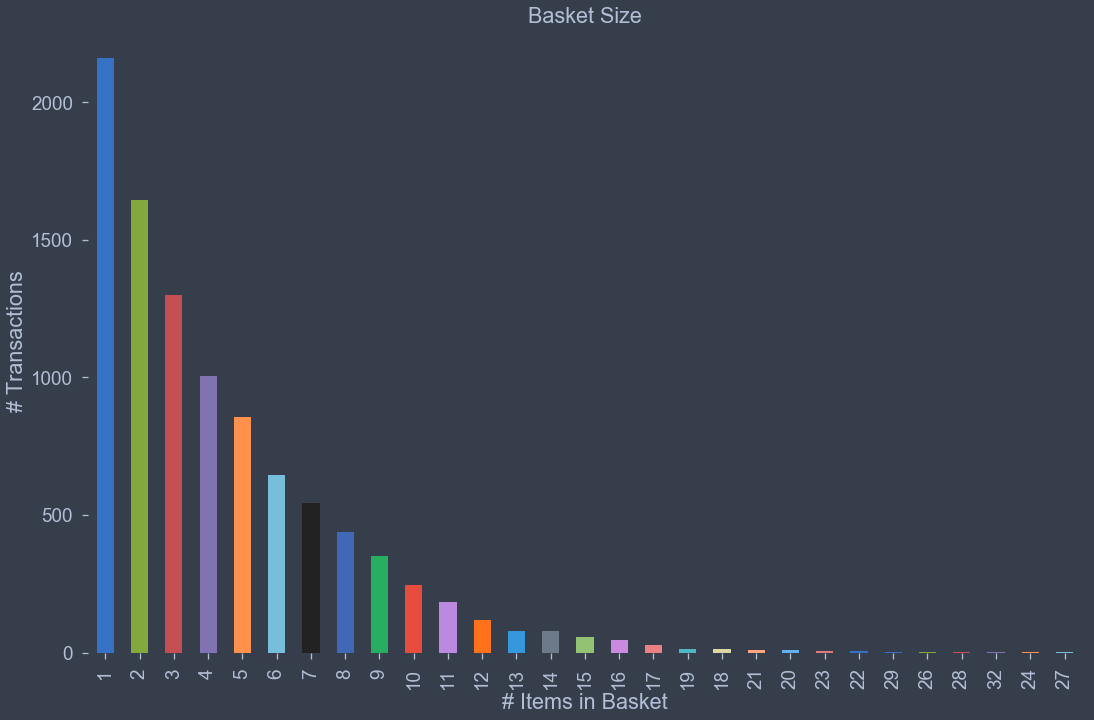

In [99]:
baskets.count(axis=1).value_counts().plot.bar(title='Basket Size')
plt.xlabel('# Items in Basket')
plt.ylabel('# Transactions')
plt.tight_layout();

### Reshape data to create transaction-product matrix

In [100]:
baskets_stacked = baskets.stack()
baskets_stacked.index.names = ['tx_id', 'basket_id']
baskets_stacked.head()

tx_id  basket_id
0      0                   citrus fruit
       1            semi-finished bread
       2                      margarine
       3                    ready soups
1      0                 tropical fruit
dtype: object

In [101]:
baskets_stacked.reset_index('basket_id', drop=True, inplace=True)

### Explore Item Frequencies

In [102]:
baskets_stacked.value_counts().head()

whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
dtype: int64

In [103]:
baskets_stacked.value_counts().tail()

kitchen utensil          4
bags                     4
preservation products    2
sound storage medium     1
baby food                1
dtype: int64

In [104]:
baskets_stacked.nunique()

169

### Finalize Transaction-Product Matrix

In [105]:
items = pd.get_dummies(baskets_stacked, prefix='', prefix_sep='')
items.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43367 entries, 0 to 9834
Columns: 169 entries, Instant food products to zwieback
dtypes: uint8(169)
memory usage: 7.3 MB


In [106]:
items.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
tx_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sum indicator variables by transaction

In [107]:
items = items.groupby(level='tx_id').sum()
items.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
tx_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Create function from data transform steps 

In [108]:
def get_transaction_data():
    """Load groceries transaction data into DataFrame"""
    df = pd.read_csv('grocery_transactions.csv')
    df = df.stack().reset_index(-1, drop=True)
    df.index.names = ['tx_id']
    df = pd.get_dummies(df, prefix='', prefix_sep='')
    return df.groupby(level='tx_id').sum()

### Explore Item Support

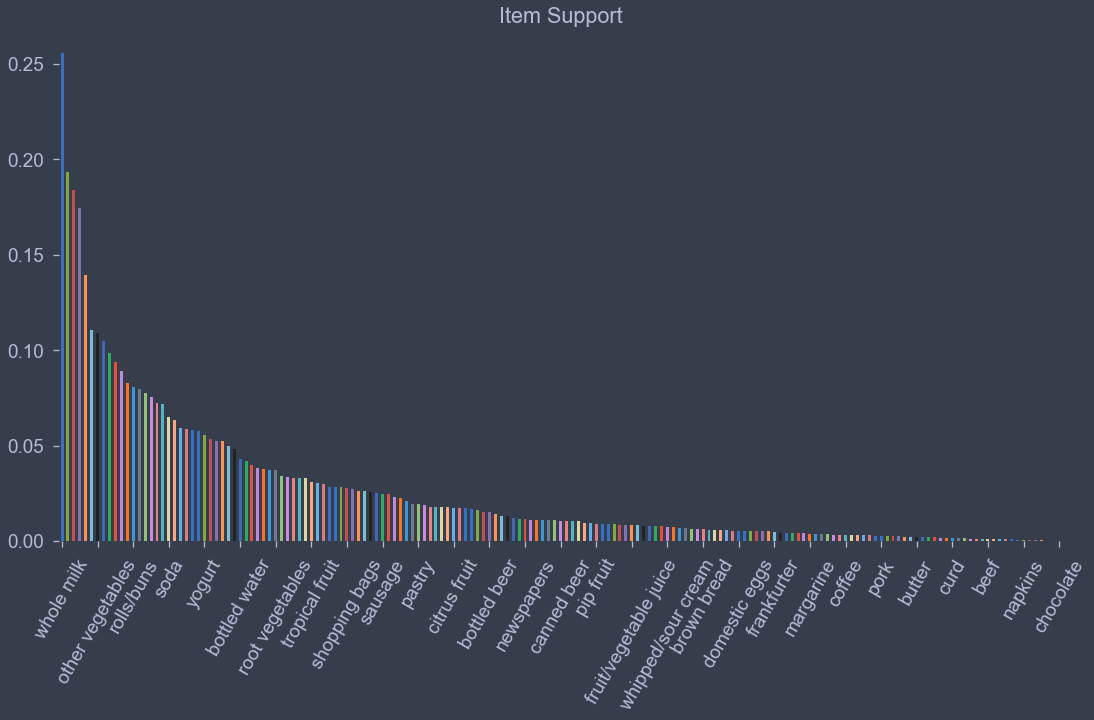

In [111]:
support = items.sum().div(len(items)).sort_values(ascending=False)
ax = support.plot.bar(title='Item Support')
ax.locator_params(nbins=30, axis='x')
plt.xticks(rotation=60)
plt.tight_layout();

### Display Transaction-Product Matrix

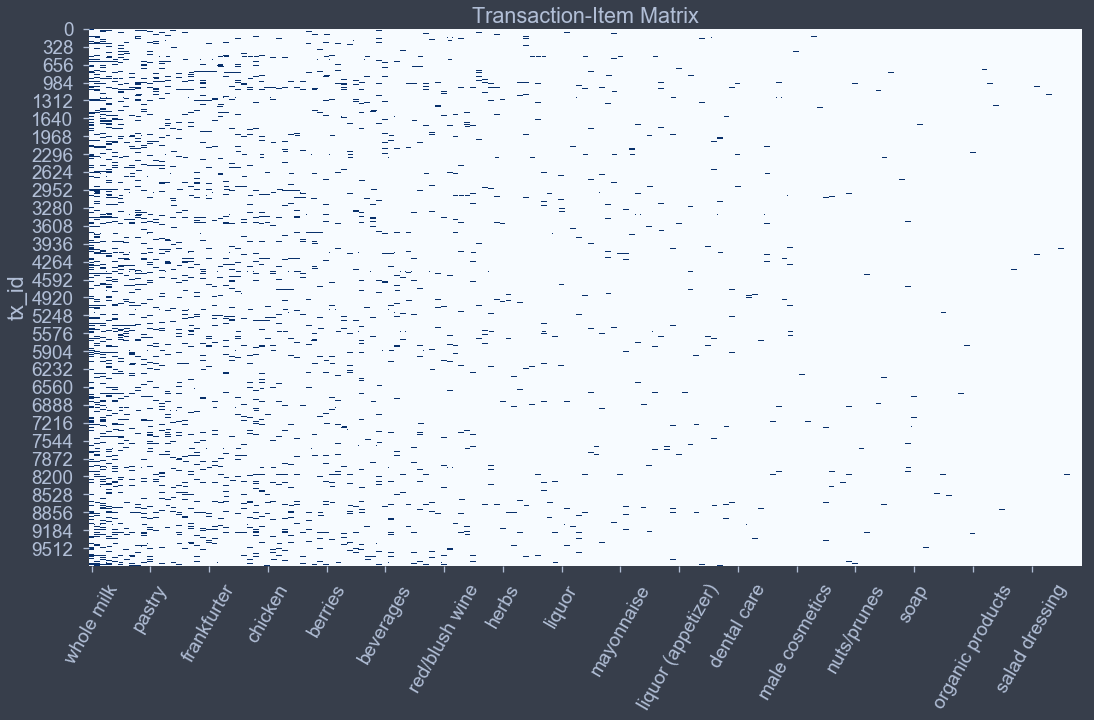

In [110]:
sns.heatmap(items.loc[:, support.index], cbar=False,
            cmap='Blues', xticklabels=10)
plt.gca().set_title('Transaction-Item Matrix')
plt.xticks(rotation=60)
plt.tight_layout();